In [1]:
from __future__ import division
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')


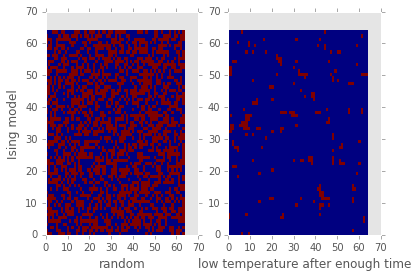

In [55]:
#low T

# J = 1 ferromagnetism 

l = 64
T = 2.0
beta = 1/T

s= np.ones((l,l))

for i in range(l):
    for j in range(l):
        if random.random() > 0.5:
            s[i,j] = -s[i,j]
plt.subplot(1,2,1)
plt.pcolor(s)
plt.ylabel('Ising model')
plt.xlabel('random')
           
turns = 0

dE = np.zeros((l,l))
while turns < 300:
    turns = turns + 1
    for i in range(l):
        for j in range(l):
            dE[i,j] =  0.5 * 2 * s[i,j]*(s[(i-1)%l,j]+s[(i+1)%l,j]+s[i,(j-1)%l]+s[i,(j+1)%l])
            if dE[i,j]  < 0 or random.random() < np.exp(-2*beta* dE[i,j]):
                s[i,j] = - s[i,j]
plt.subplot(1,2,2)                
plt.pcolor(s)
plt.xlabel('low temperature after enough time')

In [61]:
np.mean(-dE/2)

-1.739013671875

In [111]:
#Mean energy and mean square magnetization 

def meanEm(T,turns=300,lattice_size=64):
    beta = 1/T

    s= np.ones((l,l))

    for i in range(l):
        for j in range(l):
            if random.random() > 0.5:
                s[i,j] = -s[i,j]
    turns = 0

    dE = np.zeros((l,l))
    while turns < 300:
        turns = turns + 1
        for i in range(l):
            for j in range(l):
                dE[i,j] =  0.5 * 2 * s[i,j]*(s[(i-1)%l,j]+s[(i+1)%l,j]+s[i,(j-1)%l]+s[i,(j+1)%l])
                if dE[i,j]  < 0 or random.random() < np.exp(-2*beta* dE[i,j]):
                    s[i,j] = - s[i,j]
    return np.mean(-dE/2), abs(sum(sum(s)))/lattice_size**2
    

In [68]:
Ts = np.arange(0.2,15,0.2)
len(Ts), Ts[0]

(74, 0.20000000000000001)

In [112]:
meanEs = []
meanMs = []
for i in Ts:
    meanEs=meanEs+[meanEm(i)[0]]
    meanMs=meanMs+[meanEm(i)[1]]

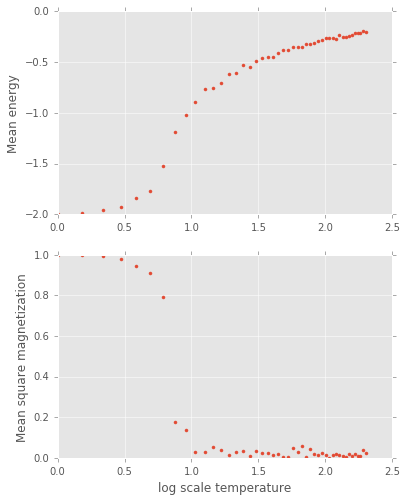

In [234]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
plt.plot(np.log(Ts[4:50]),meanEs[4:50],'.')
plt.ylabel('Mean energy')
plt.subplot(2,1,2)
plt.plot(np.log(Ts[4:50]),meanMs[4:50],'.')
plt.xlabel('log scale temperature')
plt.ylabel('Mean square magnetization')



In [236]:
# trial to gain the energy fluctuation.


var = []
for i in range(len(Ts)-1):
    DE = meanEs[i+1] - meanEs[i]
    DT = Ts[i+1]-Ts[i] # for this case  
    var = var + [DE/DT * Ts[i]**2]

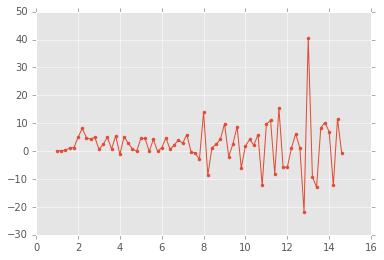

In [237]:
plt.plot(Ts[4:len(Ts)-1],var[4:len(Ts)],'.-')

Of course, it is very ugly. The energy plot is not continuous and does not provide the good derivatives

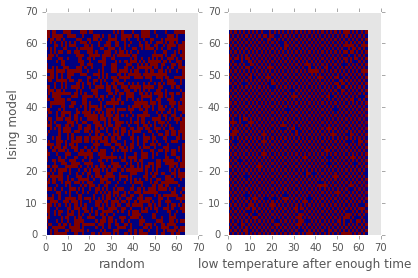

In [5]:
#low T

# J = -1

l = 64
T = 2.0
beta = 1/T

s= np.ones((l,l))

for i in range(l):
    for j in range(l):
        if random.random() > 0.5:
            s[i,j] = -s[i,j]
plt.subplot(1,2,1)
plt.pcolor(s)
plt.ylabel('Ising model')
plt.xlabel('random')
           
turns = 0

dE = np.zeros((l,l))
while turns < 300:
    turns = turns + 1
    for i in range(l):
        for j in range(l):
            dE[i,j] =  -0.5 * 2 * s[i,j]*(s[(i-1)%l,j]+s[(i+1)%l,j]+s[i,(j-1)%l]+s[i,(j+1)%l])
            if dE[i,j]  < 0 or random.random() < np.exp(-2*beta* dE[i,j]):
                s[i,j] = - s[i,j]
plt.subplot(1,2,2)                
plt.pcolor(s)
plt.xlabel('low temperature after enough time')

In [12]:
np.mean(-dE/2)

-1.7451171875

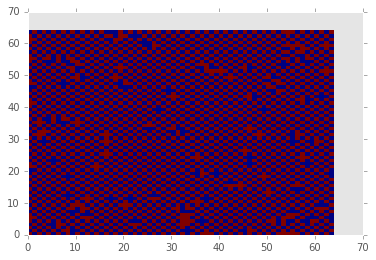

In [13]:
plt.pcolor(s)

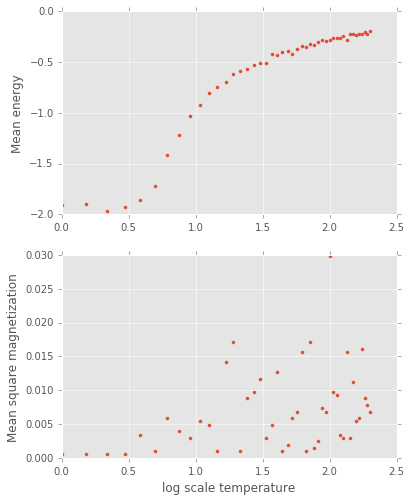

In [4]:
# J = -1

#Mean energy and mean square magnetization 

def meanEm(T,turns=300,l=64):
    beta = 1/T

    s= np.ones((l,l))

    for i in range(l):
        for j in range(l):
            if random.random() > 0.5:
                s[i,j] = -s[i,j]
    turns = 0

    dE = np.zeros((l,l))
    while turns < 300:
        turns = turns + 1
        for i in range(l):
            for j in range(l):
                dE[i,j] =  - 0.5 * 2 * s[i,j]*(s[(i-1)%l,j]+s[(i+1)%l,j]+s[i,(j-1)%l]+s[i,(j+1)%l])
                if dE[i,j]  < 0 or random.random() < np.exp(-2*beta* dE[i,j]):
                    s[i,j] = - s[i,j]
    return np.mean(-dE/2), abs(sum(sum(s)))/l**2

Ts = np.arange(0.2,15,0.2)

meanEs = []
meanMs = []
for i in Ts:
    meanEs=meanEs+[meanEm(i)[0]]
    meanMs=meanMs+[meanEm(i)[1]]
    
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
plt.plot(np.log(Ts[4:50]),meanEs[4:50],'.')
plt.ylabel('Mean energy')
plt.subplot(2,1,2)
plt.plot(np.log(Ts[4:50]),meanMs[4:50],'.')
plt.xlabel('log scale temperature')
plt.ylabel('Mean square magnetization')    

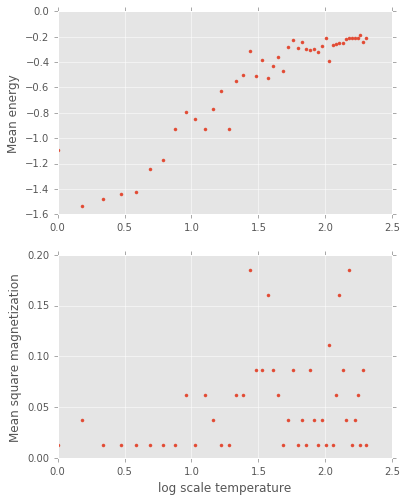

In [14]:
# J = -1, and odd dimensional lattice 

#Mean energy and mean square magnetization 

def meanEm(T,turns=30,l=9):
    beta = 1/T

    s= np.ones((l,l))

    for i in range(l):
        for j in range(l):
            if random.random() > 0.5:
                s[i,j] = -s[i,j]
    turns = 0

    dE = np.zeros((l,l,100))
    while turns < 30:
        turns = turns + 1
        for i in range(l):
            for j in range(l):
                for k in range(100):
                    dE[i,j,k] =  - 0.5 * 2 * s[i,j]*(s[(i-1)%l,j]+s[(i+1)%l,j]+s[i,(j-1)%l]+s[i,(j+1)%l])
                    if dE[i,j,k]  < 0 or random.random() < np.exp(-2*beta* dE[i,j,k]):
                        s[i,j] = - s[i,j]
    return np.mean(-dE/2), abs(sum(sum(s)))/l**2

Ts = np.arange(0.2,15,0.2)

meanEs = []
meanMs = []
for i in Ts:
    meanEs=meanEs+[meanEm(i)[0]]
    meanMs=meanMs+[meanEm(i)[1]]
    
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
plt.plot(np.log(Ts[4:50]),meanEs[4:50],'.')
plt.ylabel('Mean energy')
plt.subplot(2,1,2)
plt.plot(np.log(Ts[4:50]),meanMs[4:50],'.')
plt.xlabel('log scale temperature')
plt.ylabel('Mean square magnetization')    

In [ ]:

l = 64
T = 2.0
beta = 1/T

s= np.ones((l,l))

for i in range(l):
    for j in range(l):
        if random.random() > 0.5:
            s[i,j] = -s[i,j]
plt.subplot(1,2,1)
plt.pcolor(s)
plt.ylabel('Ising model')
plt.xlabel('random')
           
turns = 0

dE = np.zeros((l,l))
while turns < 300:
    turns = turns + 1
    for i in range(l):
        for j in range(l):
            dE[i,j] =  - 0.5 * 2 * s[i,j]*(s[(i-1)%l,j]+s[(i+1)%l,j]+s[i,(j-1)%l]+s[(i+1)%l,(j-1)%l]+ \
                                               s[(i-1)%l,(j+1)%l]+s[i,(j+1)%l])
            if dE[i,j]  < 0 or random.random() < np.exp(-2*beta* dE[i,j]):
                s[i,j] = - s[i,j]
plt.subplot(1,2,2)                
plt.pcolor(s)
plt.xlabel('low temperature after enough time')

See the minimum energy around T = 0 is bigger than J = 1 case.

In [ ]:
# J = -1

# Triangle Ising model 


def meanEm(T,turns=300,l=64):
    beta = 1/T

    s= np.ones((l,l))

    for i in range(l):
        for j in range(l):
            if random.random() > 0.5:
                s[i,j] = -s[i,j]
    turns = 0

    dE = np.zeros((l,l))
    while turns < 300:
        turns = turns + 1
        for i in range(l):
            for j in range(l):
                dE[i,j] =  - 0.5 * 2 * s[i,j]*(s[(i-1)%l,j]+s[(i+1)%l,j]+s[i,(j-1)%l]+s[(i+1)%l,(j-1)%l]+ \
                                               s[(i-1)%l,(j+1)%l]+s[i,(j+1)%l])
                if dE[i,j]  < 0 or random.random() < np.exp(-2*beta* dE[i,j]):
                    s[i,j] = - s[i,j]
    return np.mean(-dE/2), abs(sum(sum(s)))/l**2

Ts = np.arange(0.2,15,0.2)

meanEs = []
meanMs = []
for i in Ts:
    meanEs=meanEs+[meanEm(i)[0]]
    meanMs=meanMs+[meanEm(i)[1]]
    
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
plt.plot(np.log(Ts[4:50]),meanEs[4:50],'.')
plt.ylabel('Mean energy')
plt.subplot(2,1,2)
plt.plot(np.log(Ts[4:50]),meanMs[4:50],'.')
plt.xlabel('log scale temperature')
plt.ylabel('Mean square magnetization')    

In [13]:
import networkx as nx
G = nx.Graph(directed=False)
G.add_node((0,0))

import networkx.drawing.nx_agraph 

In [18]:
len(G.nodes())

217

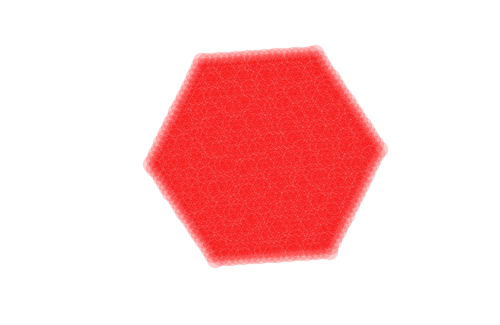

In [21]:
for n in xrange(4):
    for (q,r) in G.nodes(): 
        G.add_edge((q,r),(q,r-1))
        G.add_edge((q,r),(q-1,r))
        G.add_edge((q,r),(q-1,r+1))
        G.add_edge((q,r),(q,r+1))
        G.add_edge((q,r),(q+1,r-1))
        G.add_edge((q,r),(q+1,r))

pos = networkx.drawing.nx_agraph.graphviz_layout(G,prog="neato")
nx.draw(G,pos,alpha=.2)

plt.axis('equal')
plt.show()